In [1]:
import network_stats as ns
import network_manipulation as nm
import numpy as np
import matplotlib.pyplot as plt
import SI_model_nx as si
import SIR_model as sir
import networkx as nx


# should make this into a file to inport into every notebook
dataset_paths = [
'Sociopatterns datasets/conference_2009.dat_',
'Sociopatterns datasets/highschool_2011.csv',
'Sociopatterns datasets/highschool_2012.csv',
'Sociopatterns datasets/highschool_2013.csv',
'Sociopatterns datasets/hospital_2010.dat_',
'Sociopatterns datasets/primaryschool_2014.csv',
'Sociopatterns datasets/workplace_2013.dat',
'Sociopatterns datasets/workplace_2015.dat_']

dataset_names = [
    'Conference 1', 
    'Highschool 1', 
    'Highschool 2', 
    'Highschool 3', 
    'Hospital 1', 
    'Primaryschool 1', 
    'Workplace 1', 
    'Workplace 2']

G = nm.build_nxgraph(dataset_paths[0], False) 

In [8]:
node_measures = ns.measure_nodes(G)
network_measures = ns.measure_network(G)

print('Node measures')
ns.print_dict(node_measures)
print('Network measures')
ns.print_dict(network_measures)

Node measures
degree : 23.734491315136477
weight : 14.691270256142184
closeness : 207.61231638343395
betweenness : 0.9577672733588912
eigenvector : 17.156434026362536


Network measures
nodes : 403
edges : 9565
ratio : 23.734491315136477
components : 1
density : 0.11808204634396256
path : 1.9530140858980531
diameter : 4
transitivity : 0.23590263303822398




5.0%
10.0%
15.0%
20.0%
25.0%
30.0%
35.0%
40.0%
45.0%
50.0%
55.0%
60.0%
65.0%
70.0%
75.0%
80.0%
85.0%
90.0%
95.0%
100.0%


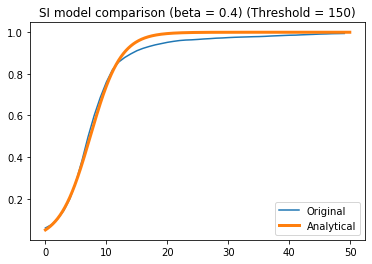

In [7]:
simulation_params = {}
simulation_params['Time'] = 50
simulation_params['Initial'] = 0.05
simulation_params['Beta'] = 0.4
simulation_params['Runs'] = 5
simulation_params['Threshold'] = 150
simulation_params['Increment'] = 0.1

si.SI_comparison(G, simulation_params, 'Original')

In [ ]:
'''

def ok(mod): # use this design to make visualisation work across models
    mod.comparison(G, simulation_params, 'Original')
    
    '''

In [5]:
G.nodes['1467']

{}

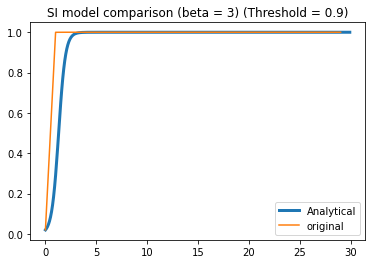

0.0


In [13]:
simulation_params = {}
simulation_params['Time'] = 30
simulation_params['Initial'] = 0.02
simulation_params['Beta'] = 3
simulation_params['Runs'] = 10
simulation_params['Threshold'] = 0.9
simulation_params['Increment'] = 0.1

#sir.comparison(G, simulation_params, 'Original')

G = sir.comparison(G, simulation_params, 'original')
print(sir.check_susecptible(G))

In [17]:
print(sir.check_susecptible(G))

0.009925558312655087


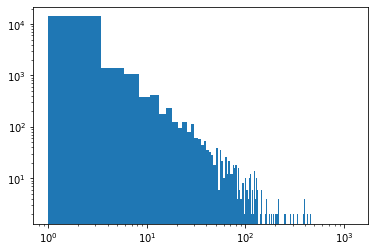

In [6]:
d, w = ns.analyse_graph(G)
plt.hist(w, bins = 500)
plt.yscale('log')
plt.xscale('log')

In [14]:
len(w)

19130

In [15]:
w.count(1)

9826

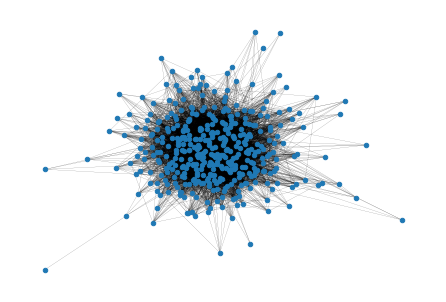

In [7]:
positions = nx.fruchterman_reingold_layout(G)
nx.draw(G, pos = positions, node_size = 20, width = 1/10)

1.0
0 : {'potential': 2, 'active': True}
1 : {'potential': 0, 'active': True}
2 : {'potential': 0, 'active': True}


0.3333333333333333
0 : {'potential': 4, 'active': False}
1 : {'potential': 2, 'active': True}
2 : {'potential': 2, 'active': False}


0.0
0 : {'potential': 5, 'active': False}
1 : {'potential': 2, 'active': False}
2 : {'potential': 3, 'active': False}


0.0
0 : {'potential': 5, 'active': False}
1 : {'potential': 2, 'active': False}
2 : {'potential': 3, 'active': False}




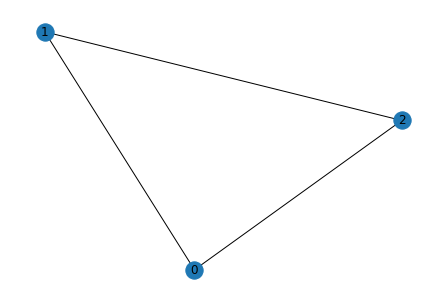

In [60]:
T = nx.Graph()
T.add_edge(0,1)
T.add_edge(0,2)
T.add_edge(1,2)
T[0][1]['weight'] = 2
T[0][2]['weight'] = 1
T[1][2]['weight'] = 1
T.nodes[0]['potential'] = 2
T.nodes[1]['potential'] = 0
T.nodes[2]['potential'] = 0

sir.initialise_status(T)
print(sir.check_susecptible(T))
for i in range(len(T)):
    print(str(i) + ' : ' + str(T.nodes[i]))
print('\n')

    
sir.propagate(T, 2, 2)
print(sir.check_susecptible(T))
for i in range(len(T)):
    print(str(i) + ' : ' + str(T.nodes[i]))
print('\n')

sir.propagate(T, 2, 2)
print(sir.check_susecptible(T))
for i in range(len(T)):
    print(str(i) + ' : ' + str(T.nodes[i]))
print('\n')

sir.propagate(T, 2, 2)
print(sir.check_susecptible(T))
for i in range(len(T)):
    print(str(i) + ' : ' + str(T.nodes[i]))
print('\n')

nx.draw(T, with_labels = True)

In [19]:
T.nodes[0]
T.nodes[1]
T.nodes[2]

{'potential': 2}

In [23]:
T.nodes[0]

{'potential': 4, 'active': False}